In [9]:
import time
import random
import string
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def random_string(length=10):
    return ''.join(random.choices(string.ascii_lowercase, k=length))

In [11]:
class HashTableChaining:
    def __init__(self, size):
        self.size = size
        self.table = [[] for _ in range(self.size)]

    def hash(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self.hash(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                self.table[index][i] = (key, value)
                return
        self.table[index].append((key, value))

    def search(self, key):
        index = self.hash(key)
        for k, v in self.table[index]:
            if k == key:
                return v
        return None

    def delete(self, key):
        index = self.hash(key)
        for i, (k, v) in enumerate(self.table[index]):
            if k == key:
                del self.table[index][i]
                return

In [12]:
class HashTableOpenAddressing:
    def __init__(self, size):
        self.size = size
        self.table = [None] * self.size

    def hash(self, key):
        return hash(key) % self.size

    def insert(self, key, value):
        index = self.hash(key)
        original_index = index
        while self.table[index] is not None:
            if self.table[index][0] == key:
                self.table[index] = (key, value)
                return
            index = (index + 1) % self.size
            if index == original_index:
                raise Exception("Tabela cheia")
        self.table[index] = (key, value)

    def search(self, key):
        index = self.hash(key)
        original_index = index
        while self.table[index] is not None:
            if self.table[index][0] == key:
                return self.table[index][1]
            index = (index + 1) % self.size
            if index == original_index:
                return None
        return None

    def delete(self, key):
        index = self.hash(key)
        original_index = index
        while self.table[index] is not None:
            if self.table[index][0] == key:
                self.table[index] = None
                return
            index = (index + 1) % self.size
            if index == original_index:
                return

In [13]:
def measure_time(hashtable, sizes):
    insert_times = []
    search_times = []
    delete_times = []
    
    for size in sizes:
        # Inserção
        ht = hashtable(size)
        start = time.time()
        for _ in range(size):
            key = 8
            ht.insert(key, random.randint(0, 100))
        insert_times.append(time.time() - start)

        # Busca
        start = time.time()
        for _ in range(size):
            key = random_string()
            ht.search(key)
        search_times.append(time.time() - start)

        # Remoção
        start = time.time()
        for _ in range(size):
            key = random_string()
            ht.delete(key)
        delete_times.append(time.time() - start)
    
    return insert_times, search_times, delete_times

In [14]:
sizes = np.linspace(1, 3000, 5, dtype=int)

In [15]:
chaining_insert, chaining_search, chaining_delete = measure_time(HashTableChaining, sizes)

In [16]:
open_addressing_insert, open_addressing_search, open_addressing_delete = measure_time(HashTableOpenAddressing, sizes)

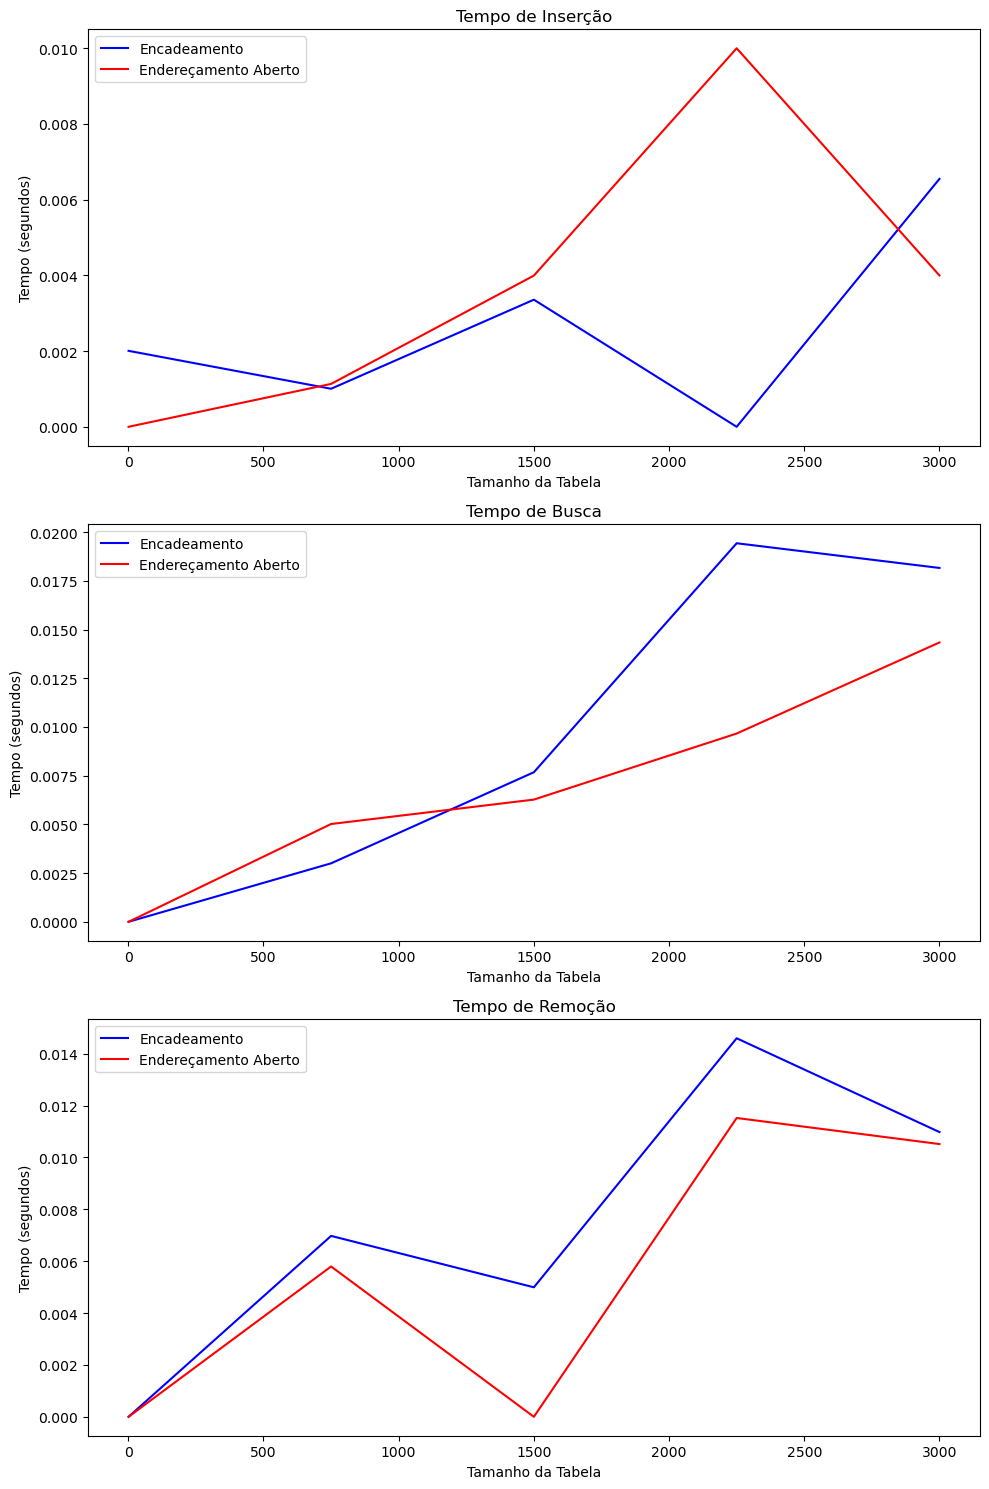

In [17]:
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Inserção
axs[0].plot(sizes, chaining_insert, label='Encadeamento', color='blue')
axs[0].plot(sizes, open_addressing_insert, label='Endereçamento Aberto', color='red')
axs[0].set_title('Tempo de Inserção')
axs[0].set_xlabel('Tamanho da Tabela')
axs[0].set_ylabel('Tempo (segundos)')
axs[0].legend()

# Busca
axs[1].plot(sizes, chaining_search, label='Encadeamento', color='blue')
axs[1].plot(sizes, open_addressing_search, label='Endereçamento Aberto', color='red')
axs[1].set_title('Tempo de Busca')
axs[1].set_xlabel('Tamanho da Tabela')
axs[1].set_ylabel('Tempo (segundos)')
axs[1].legend()

# Remoção
axs[2].plot(sizes, chaining_delete, label='Encadeamento', color='blue')
axs[2].plot(sizes, open_addressing_delete, label='Endereçamento Aberto', color='red')
axs[2].set_title('Tempo de Remoção')
axs[2].set_xlabel('Tamanho da Tabela')
axs[2].set_ylabel('Tempo (segundos)')
axs[2].legend()

plt.tight_layout()
plt.show()